In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [3]:
X,y=load_diabetes(return_X_y=True,as_frame=True)

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [5]:
tree=DecisionTreeRegressor(
                        random_state=1,
                              max_depth=4
                              # criterion='squared_error',
                              #     splitter='random',
                              #         max_leaf_nodes=10,
                         )

In [6]:
param_grid={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_features':['auto','sqrt', 'log2'],
    'ccp_alpha':[0.001,0.01,0.02,0.05]
}

In [7]:
clf=GridSearchCV(estimator=tree,
                 cv=4,
                     param_grid=param_grid,
                         verbose=10)

In [ ]:
clf.fit(X_train,y_train)

In [9]:
clf.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.05, criterion='poisson', max_depth=4,
                      max_features='auto', random_state=1)

In [10]:
clf.best_score_

0.3654395205202587

In [11]:
clf.score(X_train,y_train)

0.6527941509273139

In [12]:
clf.score(X_test,y_test)

0.1223013699342489

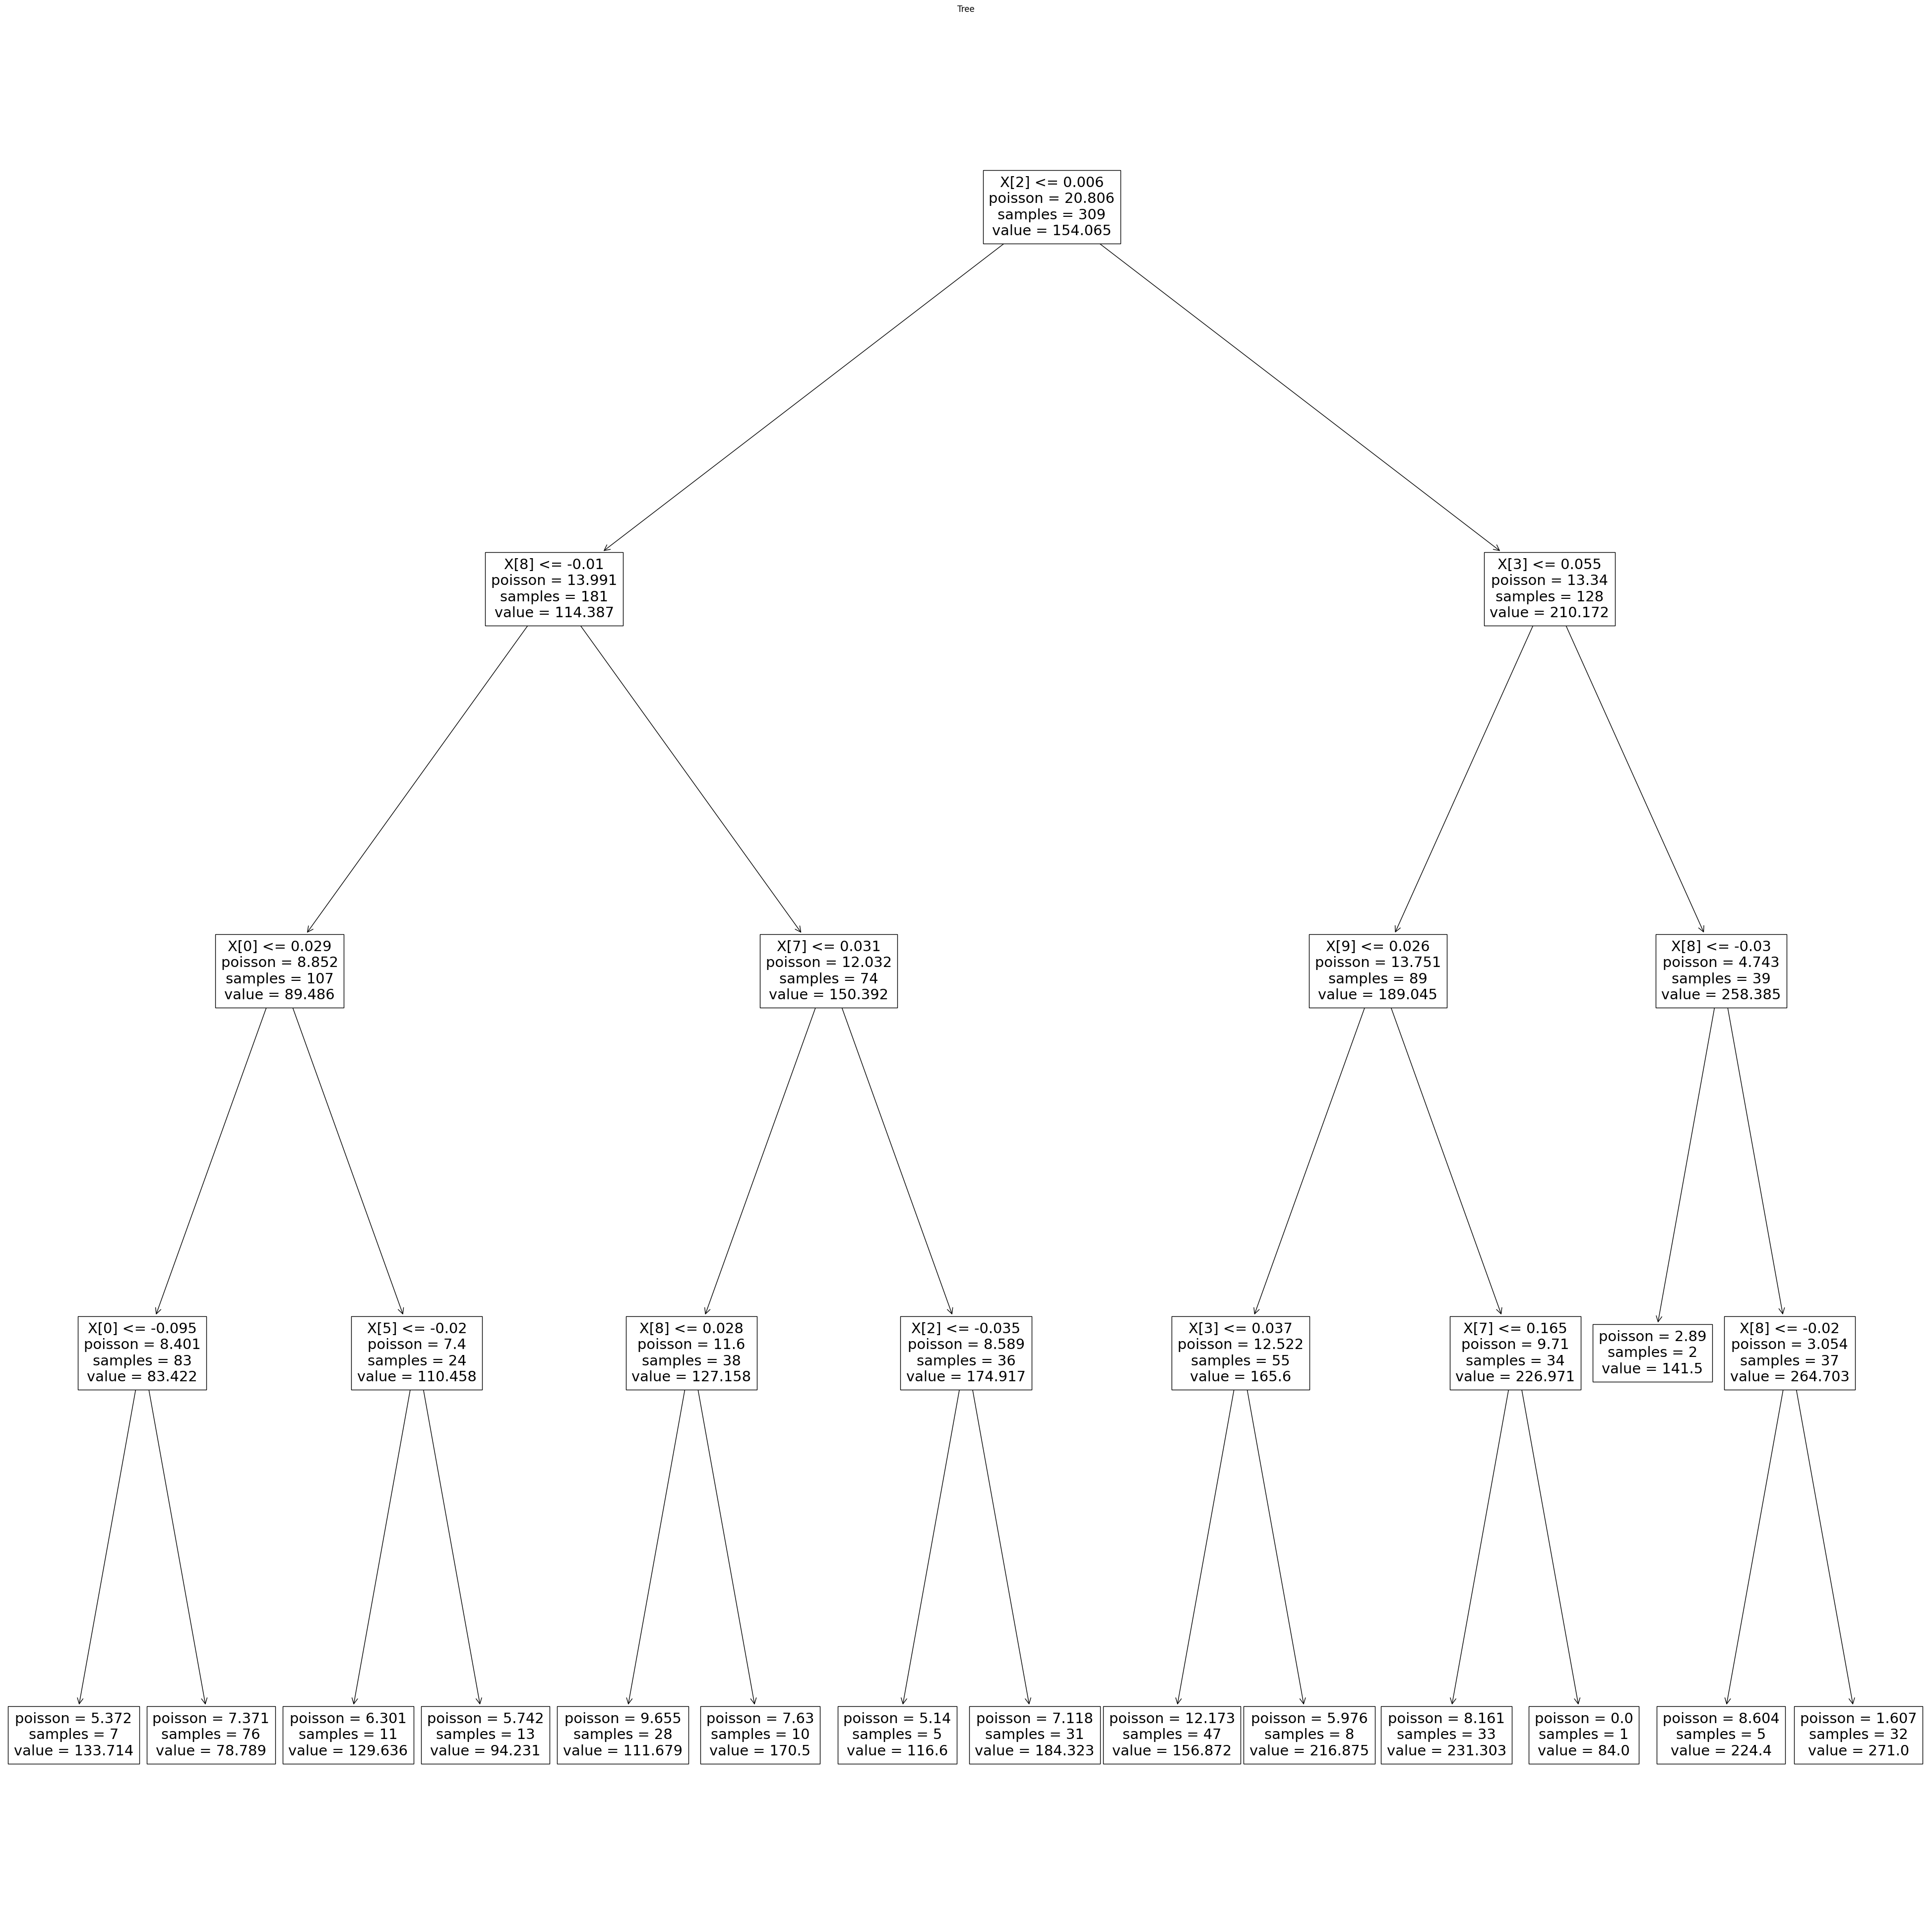

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
tree.plot_tree(clf.best_estimator_)
plt.title('Tree')
plt.savefig('tree.png')
plt.show()